<a href="https://colab.research.google.com/github/maviayten/karar_a-a-lar-_uygulamalar-/blob/main/XGBoost_Uygulama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerekli kütüphanelerin içe aktarılması
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Iris veri setinin yüklenmesi
iris = load_iris()
iris_data = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)

# Sınıf hedeflerinin eklenmesi
iris_data['species'] = iris.target

# Sınıf hedeflerinin isimlendirilmesi
iris_data['species'] = iris_data['species'].apply(lambda x: iris.target_names[x])

# Veri setinin ilk kaç satırını göster
print("Veri setinin ilk 5 satırı:")
print(iris_data.head())

# Veri setinin genel yapısını inceleme
# Veri setinin boyutlarını yazdır
print("\nVeri setinin boyutları:", iris_data.shape)

# Her sütunda eksik değer sayısını kontrol et
print("\nSütunlardaki eksik değer sayıları:")
missing_values = iris_data.isnull().sum()
print(missing_values)

# Her sütunun veri tipini kontrol et
print("\nSütunların veri tipleri:")
print(iris_data.dtypes)


Veri setinin ilk 5 satırı:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Veri setinin boyutları: (150, 5)

Sütunlardaki eksik değer sayıları:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Sütunların veri tipleri:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object


In [2]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temel İstatistiklerin İncelenmesi
# Veri setinin temel istatistiklerini göster
print("Temel İstatistikler:\n", iris_data.describe())

Temel İstatistikler:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_iris

# Iris veri setini yükleme
iris = load_iris()
X = iris.data
y = iris.target

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost sınıflandırıcısını oluşturma
xgb_clf = XGBClassifier(random_state=42)

# Modeli eğitim verileri üzerinde eğitme
xgb_clf.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma ve performans değerlendirme
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Doğruluk (Accuracy):", accuracy)
print("Sınıflandırma Raporu:\n", report)

Doğruluk (Accuracy): 1.0
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost sınıflandırıcısını oluşturma
xgb_clf = XGBClassifier()

# Grid araması için parametreler
param_grid_xgb = {
    'n_estimators': [100, 200, 300],         # Toplam ağaç sayısı
    'learning_rate': [0.01, 0.1, 0.2],       # Öğrenme oranı
    'max_depth': [3, 4, 5],                  # Maksimum derinlik
    'min_child_weight': [1, 2, 3],           # Çocuk düğüm ağırlığı
    'subsample': [0.5, 0.7, 1.0],            # Her ağacın eğitim için kullanılacak veri örneklerinin oranı
    'colsample_bytree': [0.5, 0.7, 1.0]      # Her ağacın oluşturulması için kullanılacak özelliklerin oranı
}

# GridSearchCV ile modeli ayarlama
grid_search_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=3, scoring='accuracy', verbose=1)
grid_search_xgb.fit(X_train, y_train)

# En iyi parametreler ve bu parametrelerle elde edilen en iyi skor
best_parameters_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("En İyi Parametreler:", best_parameters_xgb)
print("En İyi Skor:", best_score_xgb)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
En İyi Parametreler: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.5}
En İyi Skor: 0.942857142857143


In [9]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Modeli en iyi parametrelerle yeniden eğitme
best_xgb_clf = grid_search_xgb.best_estimator_
best_xgb_clf.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma
y_pred_xgb = best_xgb_clf.predict(X_test)

# Performans metriklerini hesaplama
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred_xgb))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_xgb))


Doğruluk (Accuracy): 1.0
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



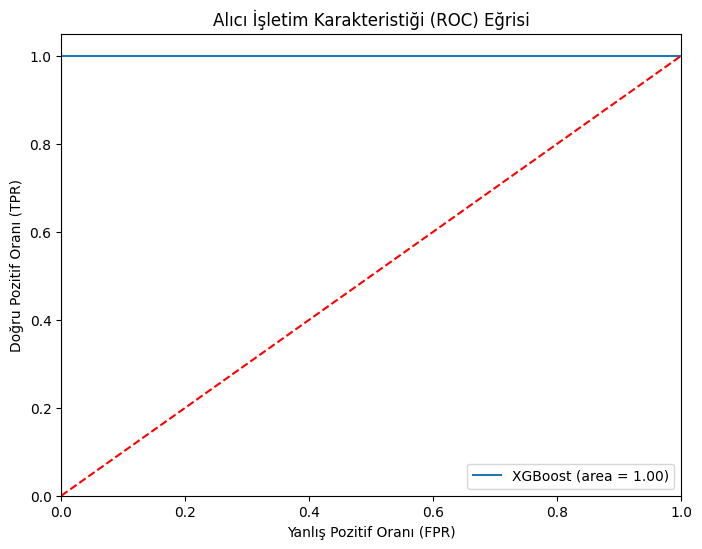

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Iris veri setini yükleme
iris = load_iris()
X = iris.data
y = iris.target

# Sadece iki sınıf için ROC eğrisi çizileceği için, veriyi iki sınıfa indirge
# Örneğin, sınıf 0 ve sınıf 1 için çalıştır
X = X[y != 2]
y = y[y != 2]

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost sınıflandırıcısını oluşturma
best_xgb_clf = XGBClassifier(random_state=42)

# Modeli eğitim verileri üzerinde eğitme
best_xgb_clf.fit(X_train, y_train)

# Tahmin olasılıklarını al
y_pred_proba = best_xgb_clf.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('Alıcı İşletim Karakteristiği (ROC) Eğrisi')
plt.legend(loc="lower right")
plt.show()